## 1) Auto Regressive Integrated Moving Average (ARIMA)
## 2) Auto Regressive Integrated Moving Average with Exogeneous (ARIMAX)
## 3) Seasonal Auto Regressive Integrated Moving Average with Exogeneous (SARIMAX)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df = pd.read_csv(r"Downloads\Index2018.csv")
df_copy = df.copy()
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = True)
df_copy.set_index('date', inplace = True)
df_copy = df_copy.asfreq('b')
df_copy = df_copy.fillna(method = 'ffill')
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [3]:
df_copy['market_val'] = df_copy.ftse

In [4]:
df_copy = df_copy.drop(['dax', 'ftse', 'nikkei'], axis = 1)
df_copy.head()

,spx,market_val
date,,
1994-01-07,469.90,3445.98
1994-01-10,475.27,3440.58
1994-01-11,474.13,3413.77
1994-01-12,474.17,3372.02
1994-01-13,472.47,3360.01


In [5]:
df_copy['returns'] = df_copy.market_val.pct_change(1).mul(100)

In [6]:
df_copy.isnull().sum()

spx           0
market_val    0
returns       1
dtype: int64

## ARIMA(1,1)

In [7]:
model_arima_ret_111 = ARIMA(df_copy.returns[1:], order = (1,1,1))
results_arima_ret_111 = model_arima_ret_111.fit()
results_arima_ret_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                 6275
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9601.059
Method:                       css-mle   S.D. of innovations              1.117
Date:                Fri, 23 Oct 2020   AIC                          19210.118
Time:                        19:47:32   BIC                          19237.096
Sample:                    01-11-1994   HQIC                         19219.466
                         - 01-29-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.222e-07   7.65e-06     -0.108      0.914   -1.58e-05    1.42e-05
ar.L1.D.returns    -0.0175      0.013     -1.383      0.167      -0.042       0.007
ma.L1.D.returns    -1.0000      0.000  -2266.131      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -57.2833           +0.0000j           57.2833            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

## Residuals of ARIMA(1,1,1)

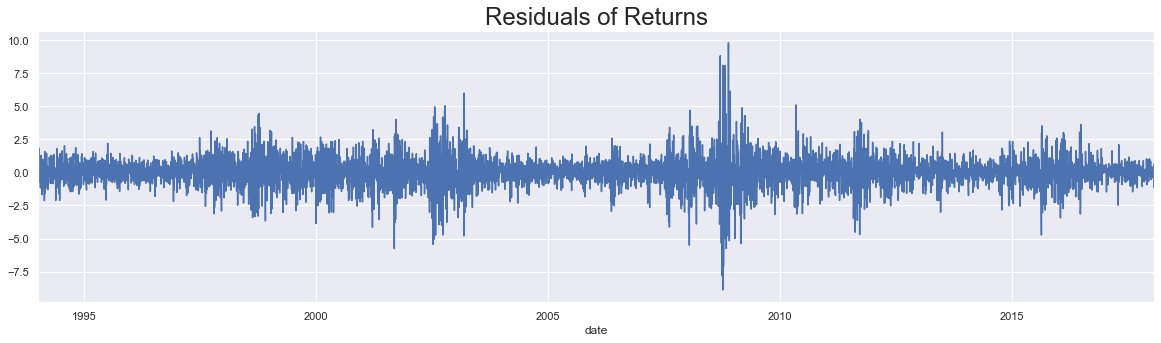

In [8]:
df_copy['res_ret_arma111'] = results_arima_ret_111.resid
df_copy.res_ret_arma111.plot(figsize = (20,5))
plt.title('Residuals of Returns', size = 24)
plt.show()

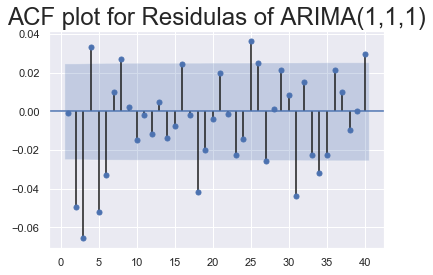

In [9]:
sgt.plot_acf(df_copy.res_ret_arma111[2:], zero = False, lags = 40)
plt.title("ACF plot for Residulas of ARIMA(1,1,1)", size = 24);

## Higher Order ARIMA models

In [10]:
model_arima_ret_311 = ARIMA(df_copy.returns[1:], order = (3,1,1))
results_arima_ret_311 = model_arima_ret_311.fit(start_ar_lags = 7)
results_arima_ret_311.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                 6275
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -9579.612
Method:                       css-mle   S.D. of innovations              1.113
Date:                Fri, 23 Oct 2020   AIC                          19171.224
Time:                        19:47:41   BIC                          19211.690
Sample:                    01-11-1994   HQIC                         19185.245
                         - 01-29-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.519e-07   7.12e-06     -0.120      0.905   -1.48e-05    1.31e-05
ar.L1.D.returns    -0.0251      0.013     -1.995      0.046      -0.050      -0.000
ar.L2.D.returns    -0.0443      0.013     -3.523      0.000      -0.069      -0.020
ar.L3.D.returns    -0.0656      0.013     -5.209      0.000      -0.090      -0.041
ma.L1.D.returns    -0.9999      0.001  -1964.391      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9973           -2.1712j            2.3893           -0.1815
AR.2            0.9973           +2.1712j            2.3893            0.1815
AR.3           -2.6701           -0.0000j            2.6701           -0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [11]:
model_arima_ret_112 = ARIMA(df_copy.returns[1:], order = (1,1,2))
results_arima_ret_112 = model_arima_ret_112.fit(start_ar_lags = 7)
results_arima_ret_112.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                 6275
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -9600.441
Method:                       css-mle   S.D. of innovations              1.117
Date:                Fri, 23 Oct 2020   AIC                          19210.882
Time:                        19:47:47   BIC                          19244.603
Sample:                    01-11-1994   HQIC                         19222.566
                         - 01-29-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -8.12e-07   8.53e-06     -0.095      0.924   -1.75e-05    1.59e-05
ar.L1.D.returns    -0.9525      0.112     -8.470      0.000      -1.173      -0.732
ma.L1.D.returns    -0.0545      0.124     -0.438      0.662      -0.298       0.189
ma.L2.D.returns    -0.9451      0.124     -7.596      0.000      -1.189      -0.701
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0499           +0.0000j            1.0499            0.5000
MA.1            1.0002           +0.0000j            1.0002            0.0000
MA.2           -1.0579           +0.0000j            1.0579            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
model_arima_ret_211 = ARIMA(df_copy.returns[1:], order = (2,1,1))
results_arima_ret_211 = model_arima_ret_211.fit(start_ar_lags = 7)
results_arima_ret_211.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                 6275
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -9593.751
Method:                       css-mle   S.D. of innovations              1.115
Date:                Fri, 23 Oct 2020   AIC                          19197.503
Time:                        19:47:54   BIC                          19231.224
Sample:                    01-11-1994   HQIC                         19209.187
                         - 01-29-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.349e-07   7.52e-06     -0.111      0.912   -1.56e-05    1.39e-05
ar.L1.D.returns    -0.0183      0.013     -1.452      0.147      -0.043       0.006
ar.L2.D.returns    -0.0483      0.013     -3.834      0.000      -0.073      -0.024
ma.L1.D.returns    -0.9999      0.000  -2067.276      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1893           -4.5441j            4.5480           -0.2566
AR.2           -0.1893           +4.5441j            4.5480            0.2566
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
model_arima_ret_113 = ARIMA(df_copy.returns[1:], order = (1,1,3))
results_arima_ret_113 = model_arima_ret_113.fit(start_ar_lags = 7)
results_arima_ret_113.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                 6275
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -9600.065
Method:                       css-mle   S.D. of innovations              1.117
Date:                Fri, 23 Oct 2020   AIC                          19212.130
Time:                        19:48:01   BIC                          19252.596
Sample:                    01-11-1994   HQIC                         19226.151
                         - 01-29-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.245e-07   7.96e-06     -0.104      0.918   -1.64e-05    1.48e-05
ar.L1.D.returns    -0.9621      0.112     -8.609      0.000      -1.181      -0.743
ma.L1.D.returns    -0.0561      0.110     -0.509      0.611      -0.272       0.160
ma.L2.D.returns    -0.9564      0.123     -7.761      0.000      -1.198      -0.715
ma.L3.D.returns     0.0129      0.019      0.669      0.504      -0.025       0.051
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0393           +0.0000j            1.0393            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
MA.2           -1.0448           +0.0000j            1.0448            0.5000
MA.3           74.4386           +0.0000j           74.4386            0.0000
-----------------------------------------------------------------------------
"""

In [14]:
model_arima_ret_312 = ARIMA(df_copy.returns[1:], order = (3,1,2))
results_arima_ret_312 = model_arima_ret_312.fit(start_ar_lags = 5)
results_arima_ret_312.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                 6275
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -9582.049
Method:                       css-mle   S.D. of innovations              1.113
Date:                Fri, 23 Oct 2020   AIC                          19178.098
Time:                        19:48:11   BIC                          19225.308
Sample:                    01-11-1994   HQIC                         19194.455
                         - 01-29-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.673e-07   6.67e-06     -0.130      0.896   -1.39e-05    1.22e-05
ar.L1.D.returns     0.3371      0.009     38.811      0.000       0.320       0.354
ar.L2.D.returns    -0.0429      0.013     -3.222      0.001      -0.069      -0.017
ar.L3.D.returns    -0.0397      0.013     -3.153      0.002      -0.064      -0.015
ma.L1.D.returns    -1.3595        nan        nan        nan         nan         nan
ma.L2.D.returns     0.3595        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6383           -1.7601j            2.4046           -0.1307
AR.2            1.6383           +1.7601j            2.4046            0.1307
AR.3           -4.3558           -0.0000j            4.3558           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            2.7814           +0.0000j            2.7814            0.0000
-----------------------------------------------------------------------------
"""

Considering the ACF plot we can see the expected best fit will be around (4,1,4) thus we will consider the models nearer to this order. after fitting all the models we can see only 5 models yeilded better results. Those are,
- ARIMA(1,1,2)
- ARIMA(1,1,3)      
- ARIMA(2,1,1)      
- ARIMA(3,1,2) 
- ARIMA(3,1,1)

In [15]:
print("ARIMA (1,1,1): \n LL = ", results_arima_ret_111.llf,"\t AIC = ", results_arima_ret_111.aic)
print("ARIMA (1,1,2): \n LL = ", results_arima_ret_112.llf,"\t AIC = ", results_arima_ret_112.aic)
print("ARIMA (1,1,3): \n LL = ", results_arima_ret_113.llf,"\t AIC = ", results_arima_ret_113.aic)
print("ARIMA (2,1,1): \n LL = ", results_arima_ret_211.llf,"\t AIC = ", results_arima_ret_211.aic)
print("ARIMA (3,1,2): \n LL = ", results_arima_ret_312.llf,"\t AIC = ", results_arima_ret_312.aic)
print("ARIMA (3,1,1): \n LL = ", results_arima_ret_311.llf,"\t AIC = ", results_arima_ret_311.aic)

ARIMA (1,1,1): 
 LL =  -9601.059149843477 	 AIC =  19210.118299686954
ARIMA (1,1,2): 
 LL =  -9600.440890369495 	 AIC =  19210.88178073899
ARIMA (1,1,3): 
 LL =  -9600.064939799533 	 AIC =  19212.129879599066
ARIMA (2,1,1): 
 LL =  -9593.751413560956 	 AIC =  19197.502827121913
ARIMA (3,1,2): 
 LL =  -9582.048911655096 	 AIC =  19178.097823310192
ARIMA (3,1,1): 
 LL =  -9579.6120778853 	 AIC =  19171.2241557706


Here we can see ARIMA(3,1,1) outperformed all the higher and lower ordered models.

In [16]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [17]:
print("For ARIMA(1,1,1) vs (3,1,1): \n p_val = " +str(LLR_test(model_arima_ret_111, model_arima_ret_311, DF = 2)))

For ARIMA(1,1,1) vs (3,1,1): 
 p_val = 0.0


p-val is less than 0.05 which implies that ARIMA(3,1,1) is better than ARIMA(1,1,1)

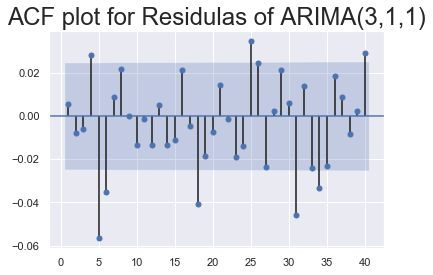

In [18]:
df_copy['res_ret_arma311'] = results_arima_ret_311.resid
sgt.plot_acf(df_copy.res_ret_arma311[2:], zero = False, lags = 40)
plt.title("ACF plot for Residulas of ARIMA(3,1,1)", size = 24);

In [19]:
model_arima_ret_511 = ARIMA(df_copy.returns[1:], order = (5,1,1))
results_arima_ret_511 = model_arima_ret_511.fit(start_ar_lags = 20)
results_arima_ret_511.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                 6275
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -9566.863
Method:                       css-mle   S.D. of innovations              1.111
Date:                Fri, 23 Oct 2020   AIC                          19149.727
Time:                        19:48:44   BIC                          19203.681
Sample:                    01-11-1994   HQIC                         19168.421
                         - 01-29-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.239e-07   7.43e-06     -0.071      0.944   -1.51e-05     1.4e-05
ar.L1.D.returns    -0.0178      0.012     -1.451      0.147      -0.042       0.006
ar.L2.D.returns    -0.0521      0.012     -4.265      0.000      -0.076      -0.028
ar.L3.D.returns    -0.0696      0.012     -5.700      0.000      -0.094      -0.046
ar.L4.D.returns     0.0295      0.012      2.418      0.016       0.006       0.053
ar.L5.D.returns    -0.0577      0.012     -4.709      0.000      -0.082      -0.034
ma.L1.D.returns    -0.9992        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6076           -0.0000j            1.6076           -0.5000
AR.2           -0.3478           -1.7426j            1.7770           -0.2814
AR.3           -0.3478           +1.7426j            1.7770            0.2814
AR.4            1.4075           -1.1970j            1.8477           -0.1122
AR.5            1.4075           +1.1970j            1.8477            0.1122
MA.1            1.0008           +0.0000j            1.0008            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
model_arima_ret_613 = ARIMA(df_copy.returns[1:], order = (6,1,3))
results_arima_ret_613= model_arima_ret_613.fit(start_ar_lags = 11)
results_arima_ret_613.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                 6275
Model:                 ARIMA(6, 1, 3)   Log Likelihood               -9569.968
Method:                       css-mle   S.D. of innovations              1.111
Date:                Fri, 23 Oct 2020   AIC                          19161.936
Time:                        19:48:57   BIC                          19236.124
Sample:                    01-11-1994   HQIC                         19187.641
                         - 01-29-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8.409e-07   6.14e-06     -0.137      0.891   -1.29e-05    1.12e-05
ar.L1.D.returns    -0.1432      0.017     -8.402      0.000      -0.177      -0.110
ar.L2.D.returns     0.7793      0.008     92.651      0.000       0.763       0.796
ar.L3.D.returns    -0.0601      0.016     -3.744      0.000      -0.092      -0.029
ar.L4.D.returns     0.0560      0.016      3.481      0.000       0.024       0.087
ar.L5.D.returns     0.0309      0.013      2.440      0.015       0.006       0.056
ar.L6.D.returns    -0.0453      0.013     -3.580      0.000      -0.070      -0.021
ma.L1.D.returns    -0.8789      0.012    -74.308      0.000      -0.902      -0.856
ma.L2.D.returns    -0.9520      0.007   -129.932      0.000      -0.966      -0.938
ma.L3.D.returns     0.8309        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0222           -0.0000j            1.0222           -0.5000
AR.2           -1.9791           -0.0000j            1.9791           -0.5000
AR.3            0.1539           -2.0161j            2.0219           -0.2379
AR.4            0.1539           +2.0161j            2.0219            0.2379
AR.5            1.2639           -0.0000j            1.2639           -0.0000
AR.6            2.1107           -0.0000j            2.1107           -0.0000
MA.1           -1.0266           +0.0000j            1.0266            0.5000
MA.2            1.0002           +0.0000j            1.0002            0.0000
MA.3            1.1721           +0.0000j            1.1721            0.0000
-----------------------------------------------------------------------------
"""

In [21]:
print("ARIMA (1,1,1): \n LL = ", results_arima_ret_111.llf,"\t AIC = ", results_arima_ret_111.aic)
print("ARIMA (6,1,3): \n LL = ", results_arima_ret_613.llf,"\t AIC = ", results_arima_ret_613.aic)
print("ARIMA (3,1,1): \n LL = ", results_arima_ret_311.llf,"\t AIC = ", results_arima_ret_311.aic)
print("ARIMA (5,1,1): \n LL = ", results_arima_ret_511.llf,"\t AIC = ", results_arima_ret_511.aic)

ARIMA (1,1,1): 
 LL =  -9601.059149843477 	 AIC =  19210.118299686954
ARIMA (6,1,3): 
 LL =  -9569.96809903112 	 AIC =  19161.93619806224
ARIMA (3,1,1): 
 LL =  -9579.6120778853 	 AIC =  19171.2241557706
ARIMA (5,1,1): 
 LL =  -9566.863316205132 	 AIC =  19149.726632410264


Here we can see ARIMA(5,1,1) out performed all the other higher and lower order models thus it is the best for our data.

In [22]:
print("For ARIMA(3,1,1) vs (5,1,1): \n p_val = " +str(LLR_test(model_arima_ret_311, model_arima_ret_511, DF = 2)))

For ARIMA(3,1,1) vs (5,1,1): 
 p_val = 0.0


Thus we can see ARIMA(5,1,1) is better than ARIMA(3,1,1)

In [23]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [24]:
print("For ARIMA(3,1,1) vs (6,1,3): \n p_val = " +str(LLR_test(model_arima_ret_311, model_arima_ret_613, DF = 5)))

For ARIMA(3,1,1) vs (6,1,3): 
 p_val = 0.002


In [25]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [26]:
print("For ARIMA(5,1,1) vs (6,1,3): \n p_val = " +str(LLR_test(model_arima_ret_511, model_arima_ret_613, DF = 3)))

For ARIMA(5,1,1) vs (6,1,3): 
 p_val = 1.0


Thus it is clear that ARIMA(5,1,1) is better than ARIMA(6,1,3)

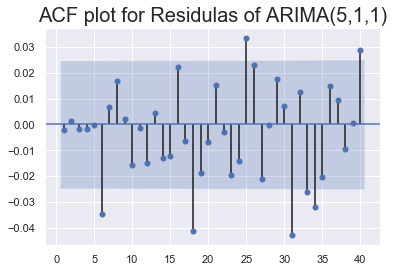

In [27]:
df_copy['res_ret_arma511'] = results_arima_ret_511.resid
sgt.plot_acf(df_copy.res_ret_arma511[2:], zero = False, lags = 40)
plt.title("ACF plot for Residulas of ARIMA(5,1,1)", size = 20);

## Model with higher level of integration

In [28]:
df_copy['delta_prices'] = df_copy.market_val.diff()

In [29]:
model_arima_del_111 = ARIMA(df_copy.delta_prices[1:], order = (1,0,1))
results_arima_del_111 = model_arima_del_111.fit()
results_arima_del_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 6276
Model:                     ARMA(1, 1)   Log Likelihood              -34417.643
Method:                       css-mle   S.D. of innovations             58.269
Date:                Fri, 23 Oct 2020   AIC                          68843.285
Time:                        19:50:34   BIC                          68870.263
Sample:                    01-10-1994   HQIC                         68852.633
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6750      0.581      1.162      0.245      -0.463       1.813
ar.L1.delta_prices     0.8355      0.078     10.778      0.000       0.684       0.987
ma.L1.delta_prices    -0.8702      0.070    -12.464      0.000      -1.007      -0.733
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1968           +0.0000j            1.1968            0.0000
MA.1            1.1492           +0.0000j            1.1492            0.0000
-----------------------------------------------------------------------------
"""

In [30]:
sts.adfuller(df_copy.delta_prices[1:])

(-35.62356825180311,
 0.0,
 5,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68467.67159603653)

## ARIMAX

Here including the past values and the residuas we also use an exogenious variable to fit the data such that it is related to the variable of our interest. For eq lets fit ARIMAX model with SPX as exogeneous variable. Thus we have

In [31]:
model_arimax_spx_111 = ARIMA(df_copy.market_val, exog = df_copy.spx, order = (1,1,1))
results_arimax_spx_111 = model_arimax_spx_111.fit()
results_arimax_spx_111.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.market_val   No. Observations:                 6276
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34417.384
Method:                       css-mle   S.D. of innovations             58.267
Date:                Fri, 23 Oct 2020   AIC                          68844.768
Time:                        19:50:38   BIC                          68878.490
Sample:                    01-10-1994   HQIC                         68856.452
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4084      1.653     -0.247      0.805      -3.648       2.831
spx                    0.0008      0.001      0.703      0.482      -0.002       0.003
ar.L1.D.market_val     0.8336      0.078     10.737      0.000       0.681       0.986
ma.L1.D.market_val    -0.8683      0.070    -12.401      0.000      -1.006      -0.731
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1996           +0.0000j            1.1996            0.0000
MA.1            1.1517           +0.0000j            1.1517            0.0000
-----------------------------------------------------------------------------
"""

## SARIMAX

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
model_sarimax = SARIMAX(df_copy.market_val, exog= df_copy.spx, order = (1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        market_val   No. Observations:                 6277
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -33290.839
Date:                           Fri, 23 Oct 2020   AIC                          66595.679
Time:                                   19:51:05   BIC                          66642.891
Sample:                               01-07-1994   HQIC                         66612.037
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.5858      0.031     83.333      0.000       2.525       2.647
ar.L1          0.9999      0.001   1594.607      0.000       0.999       1.001
ma.L1         -0.2796      0.009    -31.724      0.000      -0.297      -0.262
ar.S.L5        0.9798      0.004    262.434      0.000       0.973       0.987
ar.S.L10       0.0201      0.001     16.895      0.000       0.018       0.022
ma.S.L5       -0.9997      0.006   -169.344      0.000      -1.011      -0.988
sigma2      2402.7076     27.974     85.891      0.000    2347.880    2457.536
===================================================================================
Ljung-Box (Q):                       92.57   Jarque-Bera (JB):              4557.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""